#Machine Problem No. 2: Predicting House Prices with Multiple Regression

Problem Statement: You are a data scientist working for a real estate company. Your task is to develop a
predictive model that can estimate the prices of houses in a particular city. The dataset provided includes
multiple features, such as the size of the house (in square feet), the number of bedrooms, the age of the
house, the proximity to downtown (in miles), and the house price. Your goal is to build a multiple
regression model that can accurately predict house prices based on these features.

#1. Data Preprocessing

*Importing libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

*Loading the dataset*

In [ ]:
house_cost = pd.read_csv('datasets_house_prices.csv')

*Checking the missing values*

In [ ]:
print ('Missing values in each column')
print (house_cost.isnull().sum())

Missing values in each column
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


*Normalizing features*

In [ ]:
features = house_cost[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
target = house_cost['Price']

features.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles)
0,3974,1,97,2.032719
1,1660,5,88,23.695207
2,2094,4,49,6.440232
3,1930,2,28,8.129315
4,1895,1,56,5.358837


#2. Model Implementation

In [ ]:
scaler = MinMaxScaler()

features_normalized = scaler.fit_transform(features)

features_normalized_df = pd.DataFrame(features_normalized, columns=features.columns)

features_normalized_df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles)
0,0.992804,0.00,0.979798,0.052059
1,0.268773,1.00,0.888889,0.787993
2,0.404568,0.75,0.494949,0.201794
3,0.353254,0.25,0.282828,0.259177
4,0.342303,0.00,0.565657,0.165056


*Implement linear regression model*

In [ ]:
X = np.c_[np.ones(features_normalized.shape[0]), features_normalized]
y = target.values

*Model Parameters*

In [ ]:
def least_squares(X,y):
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta

theta = least_squares(X,y)

print("Model parameters(Theta):", theta)

Model parameters(Theta): [244218.97893217 959690.64082922  19287.9245185  -19776.97906623
 -28325.75476905]


*Function that predict houses based on input features*

In [ ]:
def predict (X, theta):
  return np.dot(X, theta)

  predicted_prices = predict(X, theta)

  for i in range (5):
    print(f"Predicted price: {predicted_prices[i]:.2f}, Actual price: {y[i]:.2f}")

#3. Model Training

*Split dataset*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Testing set size:{len(X_test)}")

Training set size: 800, Testing set size:200


*Train the linear regression model*

In [ ]:
theta_train = least_squares (X_train, y_train)

y_train_pred = predict(X_train, theta_train)
y_test_pred = predict(X_test, theta_train)

*Calculating the Mean Squared Error (MSE)*

In [ ]:
mse_train = np.mean((y_train_pred - y_train)**2)
print(f"Training MSE:{mse_train}")

mse_test = np.mean((y_test_pred - y_test)** 2)
print(f"Test MSE:{mse_test}")

Training MSE:102060369.4788341
Test MSE:103564728.17767711


#4. Model Evaluation

In [ ]:
y_train_pred = predict(X_train, theta_train)
y_test_pred = predict(X_test, theta_train)

*Visualization for regression model*

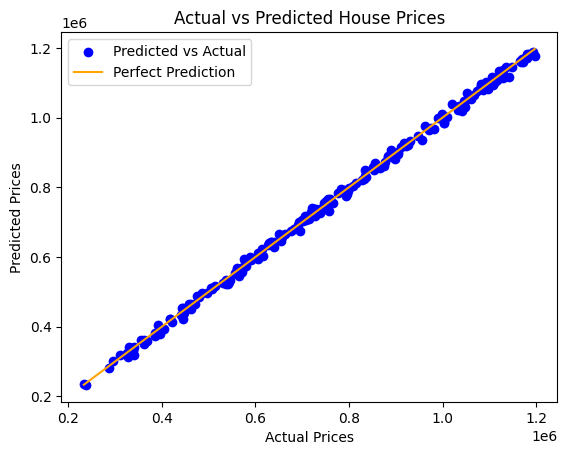

In [ ]:
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', label='Perfect Prediction')

plt.legend()

plt.show()


